<a href="https://colab.research.google.com/github/aparna-2001/machine_learning_using_python/blob/main/Linear_Regression_complete_MBA_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from scipy.stats import zscore
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
data = pd.read_csv('MBA Salary.csv')
data.shape

(50, 3)

In [3]:
data.head(10)

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


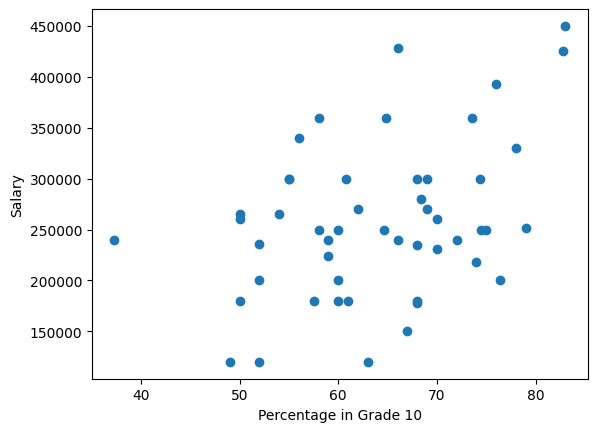

In [5]:
plt.scatter(data['Percentage in Grade 10'], data['Salary'])
plt.xlabel('Percentage in Grade 10')
plt.ylabel('Salary')
plt.show()

In [6]:
x = sm.add_constant(data['Percentage in Grade 10'])
y = data['Salary']

In [7]:
train_x, test_x, train_y, test_y = train_test_split(x,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 100)

In [8]:
data_OLS = sm.OLS(train_y, train_x).fit()
data_OLS.params

,0
const,30587.285652
Percentage in Grade 10,3560.587383


In [9]:
data_OLS.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2026-02-16 09:02      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

* The model has R-squared value of 0.211, ie the model explains 21% of the variation in salary.

* The p value of the test is 0.0029, which is less than 0.1, therefore there is a statistically significant relationship between percentage in grade 10 and salary.

* f statistic is also 0.0029, which indicates the model is statistically significant.

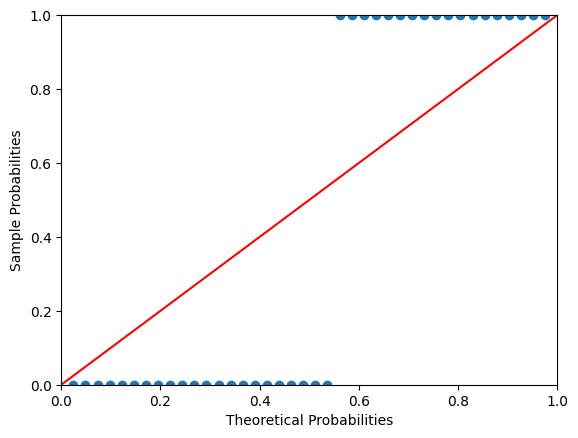

In [10]:
#using statsmodel

import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.ProbPlot(data_OLS.resid).ppplot(line='45')
plt.show()


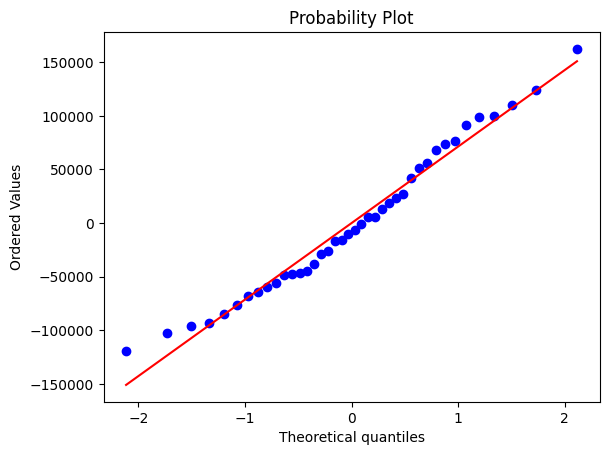

In [11]:
#using scipy

stats.probplot(data_OLS.resid, dist = 'norm', plot = plt)
plt.show()


In [12]:
def get_standardized_values(values):
    return (values - values.mean())/values.std()

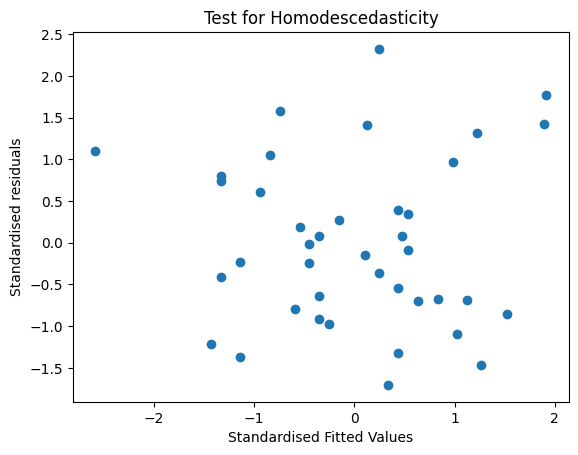

In [13]:
plt.scatter(get_standardized_values(data_OLS.fittedvalues), get_standardized_values(data_OLS.resid))
plt.title('Test for Homodescedasticity')
plt.xlabel('Standardised Fitted Values')
plt.ylabel('Standardised residuals')
plt.show()

* since the scatter plot is not funnel shaped and the points are distributed everywhere, we can say the residuals have constant variance.



**OUTLIER ANALYSIS**

In [14]:
data['z_score_salary']= zscore(data.Salary)
data[(data.z_score_salary > 3.0)|(data.z_score_salary < -3.0)]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


* no values greater than 3, so no outliers

Text(0, 0.5, 'Cooks distance')

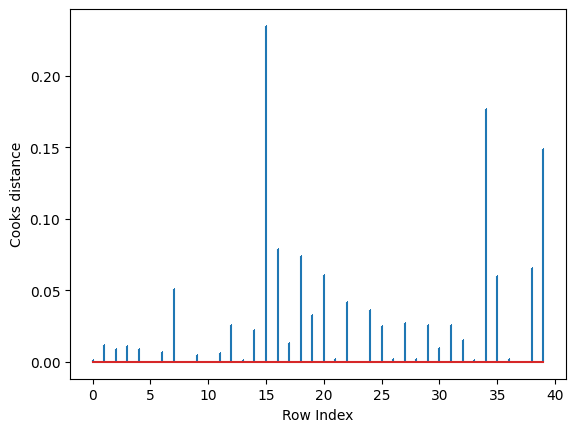

In [16]:
#cooks distance

data_influence = data_OLS.get_influence()
(c,p) = data_influence.cooks_distance
plt.stem(np.arange(len(train_x)),
         np.round(c,3),
         markerfmt = ",")
plt.xlabel('Row Index')
plt.ylabel('Cooks distance')

* nothing is more than 1, so no outliers

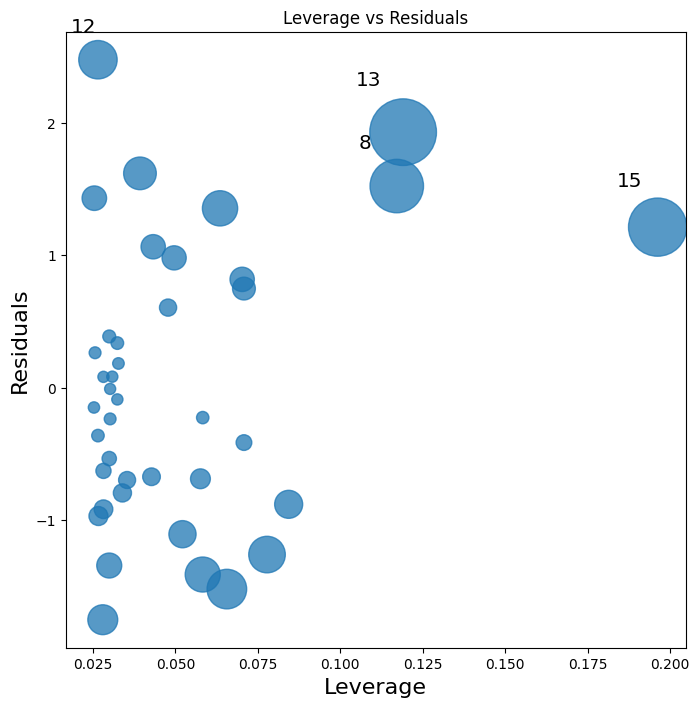

In [18]:
#leverage value(based on mahalanobis distance)

fig, ax = plt.subplots(figsize = (8,8))
influence_plot(data_OLS, ax = ax)
plt.title('Leverage vs Residuals')
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.show()

* note 13 and 15

In [19]:
#prediction

pred_y = data_OLS.predict(test_x)

**Measuring prediction accuracy**

In [21]:
np.abs(r2_score(test_y, pred_y))

np.float64(0.156645849742304)

* the model explains approximately 15% of the variance in the validation set

In [22]:
np.sqrt(mean_squared_error(test_y, pred_y))

np.float64(73458.04348346895)

In [29]:
pred_y = data_OLS.predict(test_x)
prstd, pred_y_low, pred_y_high = wls_prediction_std(data_OLS,
                           test_x,
                           alpha = 0.1)

pred_y_df = pd.DataFrame({'grade 10 perc': test_x['Percentage in Grade 10'],
                          'pred_y': pred_y,
                          'pred_y_left': pred_y_low,
                          'pred_y_right': pred_y_high})


In [30]:
pred_y_df[0:10]

,grade 10 perc,pred_y,pred_y_left,pred_y_right
6,70.0,279828.402452,158379.831862,401276.973042
36,68.0,272707.227686,151576.714839,393837.740534
37,52.0,215737.829560,92950.942211,338524.716909
28,58.0,237101.353858,115806.869437,358395.838278
43,74.5,295851.045675,173266.083158,418436.008191
49,60.8,247070.998530,126117.560802,368024.436257
5,55.0,226419.591709,104507.444206,348331.739212
33,78.0,308313.101515,184450.060303,432176.142727
20,63.0,254904.290772,134057.999077,375750.582466
42,74.4,295494.986937,172941.528507,418048.445366
